<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/An%C3%A1lise_de_Dados_AirBnb_Rio_de_Janeiro_InsideAirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O [AirBnb](https://www.airbnb.com.br/) (Air, Bed and Breakfest), é a principal solução atualmente para quem pretende se hospedar, seja em uma casa, apartamento, e para os mais exigentes até castelos.

Atualmente, a empresa é a maior do setor hoteleiro, o mais incrível é que na prática ela não é detentora de nenhum dos imóveis.

Em 2018 (10 anos após sua fundação), a startup já havia hospedado cerca de 300 milhões de pessoas em todo o mundo, números que nenhuma rede hoteleira poderia alcançar.

Como parte da sua política, o AirBnb divulga parte dos dados gerados com a sua operação por meio do portal [Inside AirBnb](http://insideairbnb.com/). Possibilitando que qualquer pessoa os obtenha para o desenvolvimento de projetos, análises e soluções por meio da Ciência de Dados.

<img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

**Neste projeto, iremos analisar os dados referentes a cidade do Rio de Janeiro, buscando insights que podem ser extraídos de dados brutos**

## Obtenção dos Dados

Todos os dados utilizados durante a análise foram retirados do portal [Inside AirBnb](http://insideairbnb.com/), sendo estes disponibilizados publicamente pela empresa.

Para essa análise iremos utilizar um único arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [ ]:
# Realizando o import das bibliotecas necessárias para a analise.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
# Realizando o import dos dados.

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv')

## Análise de Dados

Nessa etapa, iremos destrinchar os dados visando um maior entendimento do que os dados significam e o seu valor.

**Dicionário de Variáveis**

* `id` - Número de identificação do imóvel.
* `name` - Nome referente ao imóvel.
* `host_id` - Número de identificação do proprietário.
* `host_name` - Nome do anfitrião.
* `neighbourdhood_group` - Essa coluna não possui nenhum dado.
* `neighbourhood` - Nome do bairro em que o imóvel está localizado.
* `latitude` - Coordenadas de latitude do imóvel.
* `longitude` - Coordenadas de longitude do imóvel.
* `room_type` - Tipo de quarto que está sendo alugado.
* `price` - Diária para alugar o imóvel.
* `minimum_nights` - Mínimo de noites para se alugar o imóvel.
* `number_of_reviews` - Número de avaliações que o imóvel recebeu.
* `last_review` - Data em que o imóvel recebeu a última avaliação.
* `reviews_per_month` - Média de quantas avaliações o imóvel recebe por mês.
* `calculated_host_listing_count` - Quantos imóveis o anfitrião possui.
* `availability_365` - Quantos dias no ano o imóvel fica disponível.

Antes de iniciar qualquer análise aprofundada, vamos olhar como o nossos dados são, verificando as primeiras entradas.


In [ ]:
# Verificar as 5 primeiras entradas.

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


### Q1. Quantas entradas e variáveis nosso dataset possui? Quais os tipos de dados presentes? Há valores ausentes?

Vamos iniciar verificando a quantidade de entradas que temos disponíveis.
O arquivo `listings.csv` é uma versão resumida de um dataset completo, que possui mais de 30 mil entradas e mais de 100 variáveis, este dataset também está disponível no site [Inside AirBnb](http://insideairbnb.com/).

In [ ]:
# Verificar as entradas e variáveis do dataset.

print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

# Verificar o tipo dos dados em cada categoria.
print(df.dtypes)

Entradas:	 25784
Variáveis:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


Agora vamos seguir a análise verificando se há valores ausentes no nosso dataset.

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Podemos observar que a coluna `neighbourgood_group` está sem dados, podendo ser excluida do dataset. As colunas `reviews_per_month` e `last_review` também apresentam ausência de dados, porém não são dados vitais para a nossa análise.

In [ ]:
# Remover a coluna neighbourhood_group

df = df.drop(columns='neighbourhood_group');

### Q2. Qual a distribuição dos dados?

Utilizando um histograma, podemos verificar a distribuição dos dados por cada categoria.

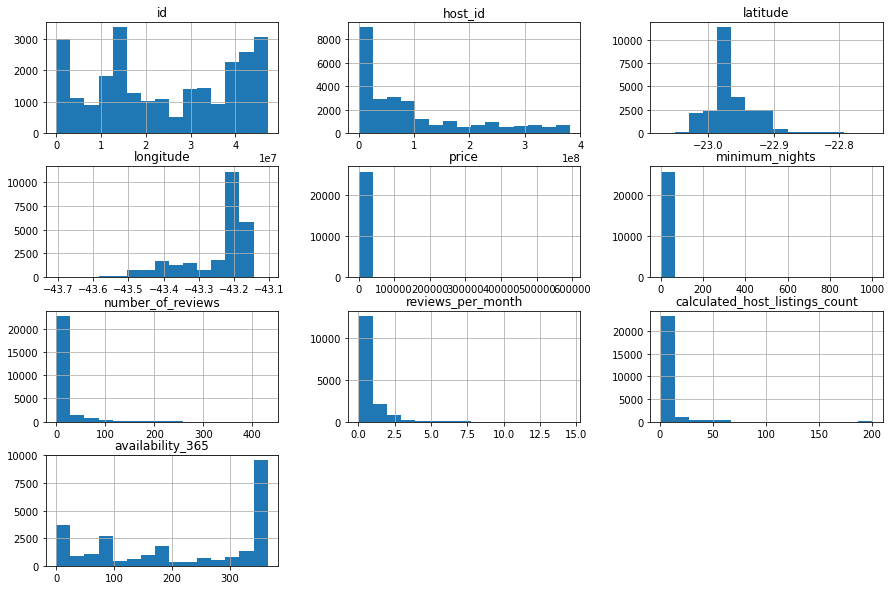

In [ ]:
df.hist(bins=15, figsize=(15,10));

### Q3. Há outliers presentes?

Como alguns histogramas apresentaram dados muito desbalanceados, iremos verificar a presença de outliers, que afetam a análise dos dados em conjunto não apresentando uma distribuição lógica.

A coluna price, minimum_nights e calculated_host_listings_count apresentam valores desbalanceados nos histogramas, para isso vamos verificar o dataset como um todo para verificar a presença de mais outliers. Para isso vamos utlizar algumas ferramentas:
- `describe()` - Para termos uma descrição melhor dos dados de cada categoria.
- `boxplots` - Iremos plotar boxplots para detectarmos os outliers



In [ ]:
# Apresentar o resumo estatístico das variáveis.

df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Observando melhor os dados estatísticos, podemos tirar algumas conclusões:
- O maior preço apresentado é de RS593.266,00, o que claramente não faz nenhum sentido.
- O menor preço apresentado é RS0,00, o que também não faz sentido, ninguém aluga um imóvel de graça.
- Há imóveis onde é necessário ficar por pelo menos 1000 noites.
- Há imóveis com disponibilidade anual de 0, ou seja, nunca estão disponíveis.

Para verificar melhor esses valores, iremos utilizar bloxpots para cada uma dessas categorias.

#### Boxplot Price


price: valores acima de 5000
438 entradas
1.6987% dos valores


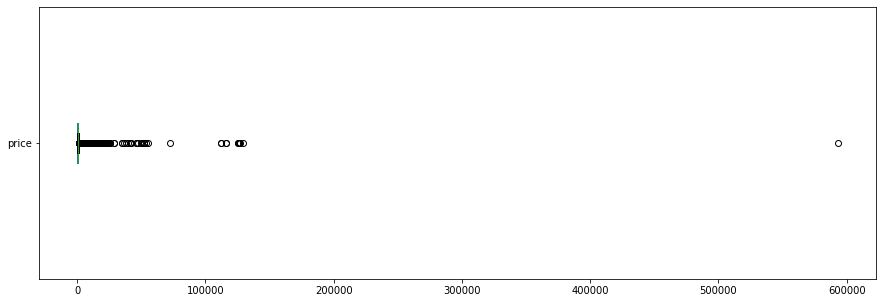

In [ ]:
# boxplot price
df.price.plot(kind='box', vert = False, figsize = (15,5));

# verificar a quantidade de entradas com valores superiores a 5000
print('\nprice: valores acima de 5000')
print('{} entradas'.format(len(df[df.price > 5000])))
print('{:.4f}% dos valores'.format(len(df[df.price > 5000]) / df.shape[0] * 100))

Como podemos observar, há poucos imóveis que apresentam um valor de diária superior a 5 mil reais, podendo ser removidos para não afetar a análise dos dados.

#### Boxplot Minimum Nights


price: valores acima de 30
199 entradas
0.7718% dos valores


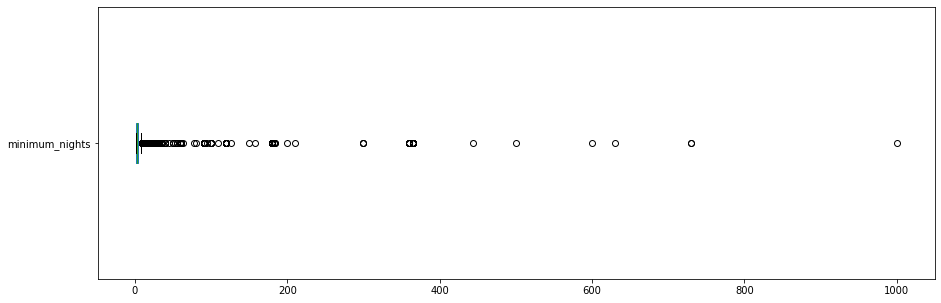

In [ ]:
# boxplot minimum nights
df.minimum_nights.plot(kind='box', vert = False, figsize = (15,5));

# verificar a quantidade de entradas maiores que 30
print('\nprice: valores acima de 30')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}% dos valores'.format(len(df[df.minimum_nights > 30]) / df.shape[0] * 100))



### Q4. Histograma sem outliers

Agora que identificamos a presença de outliers entre os dados, podemos plotar histogramas sem a presença desses dados para melhor visualização.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


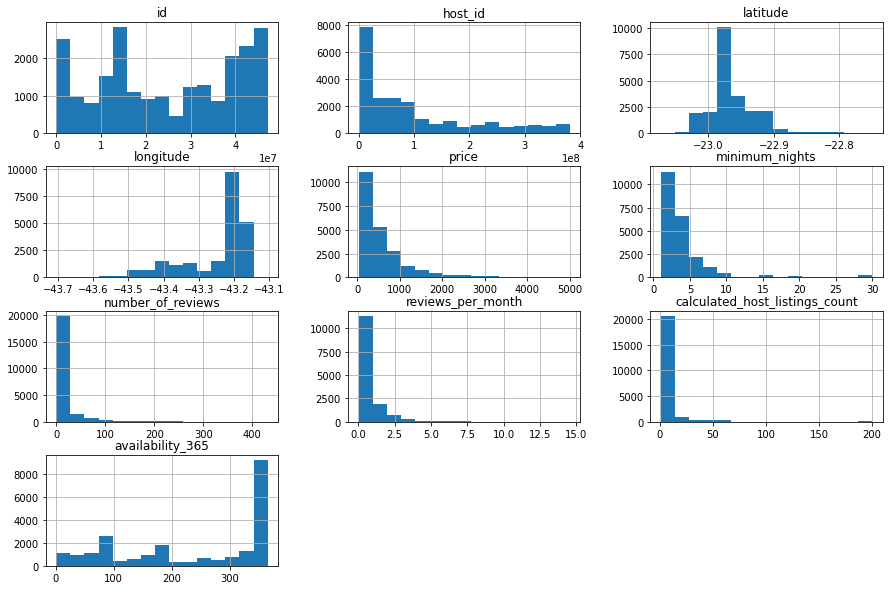

In [ ]:
# remover outliers do dataset
df_clean = df.copy()
df_clean.drop(df_clean[df.price > 5000].index, axis = 0, inplace = True);
df_clean.drop(df_clean[df.price == 0].index, axis = 0, inplace = True);
df_clean.drop(df_clean[df.minimum_nights > 30].index, axis = 0, inplace = True);
df_clean.drop(df_clean[df.availability_365 == 0].index, axis = 0, inplace = True);

# plotar um novo histograma 
df_clean.hist(bins = 15, figsize = (15,10));

Agora com os dados "limpos" podemos observar melhor cada uma das categorias.

### Q5. verificar a existência de correlação entre os dados

A correlação é a existência de relação entre duas variáveis, no nosso caso estamos buscando a semelhança entre as variáveis.

Esta relação pode ser medida através de um coeficiente de correlação. Para identificar esse coeficiente iremos utilizar duas ferramentas:
- Matriz de correlação
- Heatmap desta matriz, utilizando a biblioteca `seaborn`

In [ ]:
# gerar uma matriz de correlação
corr = df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006414,-0.028197,-0.031851,0.051198,0.028336
minimum_nights,0.006414,1.000000,-0.033638,-0.040159,-0.002016,0.029267
number_of_reviews,-0.028197,-0.033638,1.000000,0.646398,-0.046591,-0.079857
reviews_per_month,-0.031851,-0.040159,0.646398,1.000000,-0.016727,-0.156297
calculated_host_listings_count,0.051198,-0.002016,-0.046591,-0.016727,1.000000,0.005112
availability_365,0.028336,0.029267,-0.079857,-0.156297,0.005112,1.000000


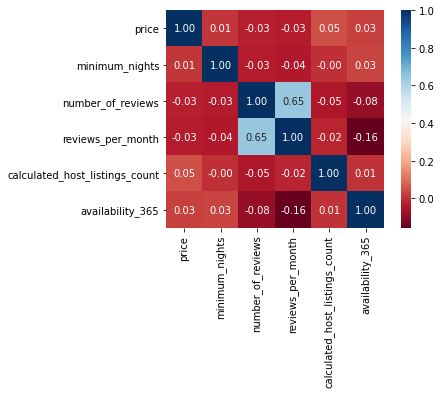

In [ ]:
# gerar um heatmap da matriz de correlação
sns.heatmap(corr, square=True, linecolor='white', annot=True, fmt = '.2f', cmap='RdBu');

## Q6. Qual o tipo de imóvel mais alugado no AirBnb?

A coluna `room_type` especifica qual o tipo de imóvel que está sendo alugado. Se você já utilizou o AirBnb alguma vez sabe que se pode alugar um imóvel completo, ou optar por alugar apenas um quarto ou compartilhar esse quarto com outras pessoas.

Para verificar qual o tipo de imóvel mais alugado, iremos contar as ocorrências de cada tipo de imóvel.

In [ ]:
# mostrar a quantidade de imóveis alugados por tipo

df_clean.room_type.value_counts()

Entire home/apt    16429
Private room        5575
Shared room          513
Hotel room            90
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de imóveis alugados por tipo

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.726722
Private room       0.246605
Shared room        0.022692
Hotel room         0.003981
Name: room_type, dtype: float64

## Q7. Qual a média de preços no Rio de Janeiro?

Como podemos agrupar variáveis em funções de outras variáveis utilizando a função `groupby()`, podemos calcular o preço médio dos imóveis em função de várias categorias.

### Preço médio da cidade

In [ ]:
df_clean.price.mean()

606.01101428761

### Preço médio por bairro

Qual o bairro mais barato do Rio de Janeiro?

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = True)[:5]

neighbourhood
Vigário Geral    59.00
Vila Kosmos      85.00
Bonsucesso       87.95
Coelho Neto      88.00
Tomás Coelho     93.50
Name: price, dtype: float64

Qual o bairro mais caro do Rio de Janeiro?

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:5]

neighbourhood
Anchieta             2729.500000
Joá                  1717.472727
Vista Alegre         1262.000000
Alto da Boa Vista    1081.413793
Grumari              1003.000000
Name: price, dtype: float64

Qualquer pessoa que não more no Brasil e for analisar esses mesmos dados, poderia achar que a Anchieta é o bairro mais caro do Rio de Janeiro. Como bom brasileiro, é estranho ver esse ranking e não encontrar o Leblon, Copacabana ou Itapema, e o motivo disso é a falta de imóveis nesses bairros, com que faz com que uma medida como a média não seja tão eficiente.

In [ ]:
# verificar quantidade de imóveis no bairro Anchieta
print(df_clean[df_clean.neighbourhood == 'Anchieta'].shape)

# verificar os imóveis no bairro Anchieta
df_clean[df_clean.neighbourhood == 'Anchieta']

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7698,13514057,Rent home for Olympics,77573884,Plinio,Anchieta,-22.82950,-43.40728,Entire home/apt,4659,1,0,NaN,NaN,1,365
20797,41532220,Casa da Andressa,303489661,Geovana Vithoria,Anchieta,-22.81787,-43.38882,Shared room,800,3,0,NaN,NaN,2,90


Como comentado, há somente 2 imóveis nesse bairro, o que confirma que a média pode não ser uma boa medida.

## Q8. Qual o número de imóveis disponíveis por bairro?

Podemos realizar a contagem de imóveis disponíveis por bairro, pra descobrirmos os bairros que possuem mais disponibilidade.

In [ ]:
# contagem de imóveis por bairro

df_clean.neighbourhood.value_counts()

Copacabana          6579
Barra da Tijuca     2299
Ipanema             2169
Jacarepaguá         1168
Botafogo            1076
                    ... 
Cavalcanti             1
Vista Alegre           1
Magalhães Bastos       1
Vila Kosmos            1
Maré                   1
Name: neighbourhood, Length: 151, dtype: int64

## Conclusões

Mesmo sendo uma breve análise, pode-se confirmar a existência de outliers dentre os imóveis publicados. Assim como há bairros onde poucos imóveis são alugados, muitos com menos de 10 imóveis por bairro, o que acaba distorcendo as análises estatísticas.

Porém, removendo parte dos outliers podemos tirar algumas conclusões:
- O preço médio da diária na cidade do Rio de Janeiro é de RS606,00.

- O bairro mais barato do Rio de Janeiro custa em média RS2729,50 e o mais barato custa RS59,00.

- O bairro com mais imóveis disponíveis é o bairro de Copacabana, seguido da Barra da Tijuca e Ipanema.

- As pessoas preferem alugar um imóvel inteiro para si ao optar por quartos ou quartos compartilhados.

Vale lembrar que este dataset é uma versão resumida, disponibilizada pela empresa, sendo utilizado para uma abordagem inicial.